<h1> Projet SNCF Dhalil BELLO & Miracle VODOUMBO </h1>

### Question 1: Explication et définition de chacunes des colonnes du fichier des objets trouvés

Colonne 1 (Date): contient les dates et heures auxquelles les objets ont été trouvés, en format ISO 8601;

Colonne 2 (Date et heure de restitution): contient les dates et heures auxquelles les objets ont été restitués, en format ISO 8601;

Colonne 3 (Gare): contient les villes et/ou gares dans lesquelles les objets ont été perdus;

Colonne 4 (Code IUC): contient la codification numérique unifiée de chaque réseau de chemins de fer;

Colonne 5 (Nature d'objets): contient les noms des objets perdus ("Porte-monnaie", "Portefeuille", "Sac à dos", "Téléphone portable",...);

Colonne 6 (Type d'objets): contient les types des objets retrouvés; les objets sont regroupés dans des catégories d'objets;

Colonne 7 (Type d'enregistrement): précise que les objets ont été enrégistrés en tant qu'objets trouvés.

In [154]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 2: Chargement des bases de données

In [155]:
#Base de données
dft = pd.read_csv("objets-trouves-restitution.csv", sep=";")
dfp = pd.read_csv("objets-trouves-gares.csv", sep=";")

In [4]:
dft.head()

Date Date et heure de restitution                Gare  \
0  2019-08-12T11:44:21+02:00                          NaN           Périgueux   
1  2019-08-12T11:56:13+02:00    2019-08-20T12:22:04+02:00          Strasbourg   
2  2019-08-12T12:21:06+02:00                          NaN  Paris Gare de Lyon   
3  2019-08-12T12:23:53+02:00                          NaN               Brest   
4  2019-08-12T12:27:18+02:00                          NaN  Paris Gare de Lyon   

     Code UIC                                Nature d'objets  \
0  87595009.0                             Téléphone portable   
1  87212027.0     Téléphone portable protégé (étui, coque,…)   
2  87686006.0  Cartable, trousse d'écolier, dossier scolaire   
3  87474007.0   Manteau, veste, blazer, parka, blouson, cape   
4  87686006.0                                      Sac à dos   

                                       Type d'objets Type d'enregistrement  
0  Appareils électroniques, informatiques, appare...          Objet trouvé  
1  Appareils électroniques, informatiques, appare...          Objet trouvé  
2                Articles d'enfants, de puériculture          Objet trouvé  
3                              Vêtements, chaussures          Objet trouvé  
4                Bagagerie: sacs, valises, cartables          Objet trouvé

On remarque lors du chargement des données que l'absence de séparateur conduit à une erreur de chargement. Il faut donc spécifier le séparateur pour que le chargement ait lieu.

### Question 3: Description de la base de données

In [4]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692310 entries, 0 to 692309
Data columns (total 7 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          692310 non-null  object 
 1   Date et heure de restitution  236984 non-null  object 
 2   Gare                          692019 non-null  object 
 3   Code UIC                      692019 non-null  float64
 4   Nature d'objets               692310 non-null  object 
 5   Type d'objets                 692310 non-null  object 
 6   Type d'enregistrement         692310 non-null  object 
dtypes: float64(1), object(6)
memory usage: 37.0+ MB


Remarquons que toutes les variables de la base de données"objets trouvés _ restitution" sont des chaînes de caractères sauf la variable Code IUC qui est un entier. Par la suite nous identifierons le nombre de valeurs nulles que contient chaque variable de notre base de données.

In [5]:
null = pd.DataFrame(dft.isnull().sum(),columns=['Valeurs nulles'])
null['Pourcentage'] = (dft.isnull().sum()/len(dft)*100)
null

Valeurs nulles  Pourcentage
Date                                       0     0.000000
Date et heure de restitution          455326    65.769092
Gare                                     291     0.042033
Code UIC                                 291     0.042033
Nature d'objets                            0     0.000000
Type d'objets                              0     0.000000
Type d'enregistrement                      0     0.000000

Les valeurs nulles sont observées au niveau des colonnes Date et heure de restitution (66%), Gare (0,04%) et Code IUC (0,04%).
On cherche ensuite à identifier les gars où plus d'articles ont été retrouvés. 



In [6]:
stat2 = pd.DataFrame(dft["Gare"].value_counts())
stat2['Pourcentage'] = (stat2["Gare"]/len(dft["Type d'objets"]))*100
stat2.head(5)

Gare  Pourcentage
Paris Gare de Lyon  52743     7.618408
Paris Montparnasse  49263     7.115743
Paris Gare du Nord  40228     5.810692
Strasbourg          31243     4.512863
Paris Saint-Lazare  28828     4.164031

On observe que les gares où sont enrégistrés le plus d'objets retrouvés sont localisées à Paris. La gare de Paris Lyon occupe la première place suivie par la gare de Paris Montparnasse et celle de Paris Gare du Nord.

### Question 4: Conversion des colonnes de date en format plus utilisable

In [7]:
#Format date
dft[['Date', 'Date et heure de restitution']].head(5)

Date Date et heure de restitution
0  2019-08-12T11:44:21+02:00                          NaN
1  2019-08-12T11:56:13+02:00    2019-08-20T12:22:04+02:00
2  2019-08-12T12:21:06+02:00                          NaN
3  2019-08-12T12:23:53+02:00                          NaN
4  2019-08-12T12:27:18+02:00                          NaN

In [8]:
#Changement du format de la date
from datetime import datetime
dft['Date']=pd.to_datetime(dft['Date'], utc=True).dt.strftime("%Y-%m-%d")
dft['Date'] = pd.to_datetime(dft['Date'])
dft['Date'].head(2)

0   2019-08-12
1   2019-08-12
Name: Date, dtype: datetime64[ns]

In [9]:
#Changement du format de la date de restitution
from datetime import datetime
dft['Date et heure de restitution']=pd.to_datetime(dft['Date et heure de restitution'], utc=True).dt.strftime("%Y-%m-%d")
dft['Date et heure de restitution'] = pd.to_datetime(dft['Date et heure de restitution'])
dft['Date et heure de restitution'].head(2)

0          NaT
1   2019-08-20
Name: Date et heure de restitution, dtype: datetime64[ns]

### Question 5: Date de début du jeu de données

In [10]:
dft['Date'].min()

Timestamp('2013-05-24 00:00:00')

### Question 6-a: Année, mois et jour de la semaine où il y a eu plus d'objets trouvés et déclarés perdus

In [11]:
#Traitement base objets déclarés perdus
dfp.head(2)

Date      Gare    Code UIC  \
0  2018-09-04T06:22:57+02:00  Mulhouse  87182063.0   
1  2017-03-22T09:20:50+01:00       NaN         NaN   

                         Nature d'objets                        Type d'objets  \
0  Sac d'enseigne (plastique, papier, …)  Bagagerie: sacs, valises, cartables   
1              Valise, sac sur roulettes  Bagagerie: sacs, valises, cartables   

  Type d'enregistrement  
0  Déclaration de Perte  
1  Déclaration de Perte

In [12]:
#Changement du format de la date
dfp['Date']=pd.to_datetime(dfp['Date'], utc=True).dt.strftime("%Y-%m-%d")
dfp['Date'] = pd.to_datetime(dfp['Date'])
dfp['Date'].head(2)

0   2018-09-04
1   2017-03-22
Name: Date, dtype: datetime64[ns]

In [14]:
#Récupération de l'année, du jour, et du mois

#Base object trouvé
dft['year']= dft['Date'].dt.year
dft['month']= dft['Date'].dt.month
dft['day']= dft['Date'].dt.day_name()

#base object perdus
dfp['year']= dfp['Date'].dt.year
dfp['month']= dfp['Date'].dt.month
dfp['day']= dfp['Date'].dt.day_name()

In [34]:
ota= pd.DataFrame(dft['year'].value_counts()).sort_index(ascending=True)
ota.reset_index(inplace=True)
ota.rename(columns={'index': 'Year', 'year':"Nbre d'objets trouvés"}, inplace=True)
ota.head()

Year  Nbre d'objets trouvés
0  2013                  12989
1  2014                  87117
2  2015                  98578
3  2016                  95555
4  2017                  97924

In [37]:
ota[ota["Nbre d'objets trouvés"] == ota["Nbre d'objets trouvés"].max()]

Year  Nbre d'objets trouvés
2  2015                  98578

Il y' a eu plus d'objets trouvés en 2015.

In [38]:
#Objets déclarés perdus par année
opa = pd.DataFrame(dfp['year'].value_counts()).sort_index(ascending=True)
opa.reset_index(inplace=True)
opa.rename(columns={'index': 'Year', 'year':"Nbre d'objets perdus"}, inplace=True)
opa.head()

Year  Nbre d'objets perdus
0  2013                  8853
1  2014                114106
2  2015                181098
3  2016                177241
4  2017                192931

In [40]:
opa[opa["Nbre d'objets perdus"] == opa["Nbre d'objets perdus"].max()]

Year  Nbre d'objets perdus
4  2017                192931

Il y'a eu plus d'objets déclarés perdus en 2017.

In [42]:
df_otpa= ota.merge(opa, on='Year')
df_otpa.head()

Year  Nbre d'objets trouvés  Nbre d'objets perdus
0  2013                  12989                  8853
1  2014                  87117                114106
2  2015                  98578                181098
3  2016                  95555                177241
4  2017                  97924                192931

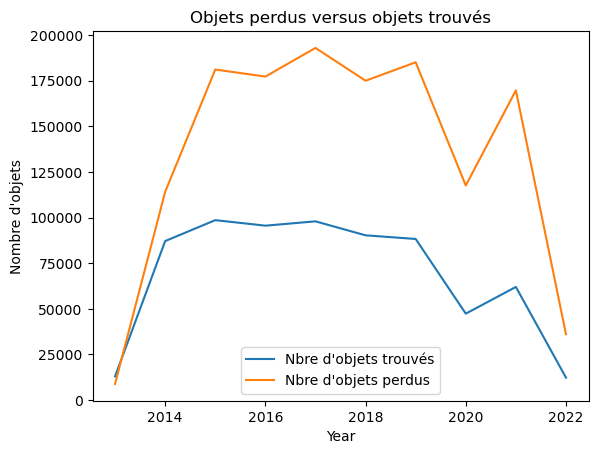

In [47]:
df_otpa.plot(kind='line', x='Year', y=["Nbre d'objets trouvés","Nbre d'objets perdus"])
plt.title('Objets perdus versus objets trouvés')
plt.xlabel('Year')
plt.ylabel("Nombre d'objets")
plt.show()

In [74]:
#import calendar
#dft["month"] = dft["month"].apply(lambda x: calendar.month_name[x])
otm= pd.DataFrame(dft['month'].value_counts()).sort_index(ascending=True)
otm.reset_index(inplace=True)
otm.rename(columns={'index': 'Month', 'month':"Nbre d'objets trouvés"}, inplace=True)
otm.head()

Month  Nbre d'objets trouvés
0     April                  47706
1    August                  64686
2  December                  56322
3  February                  55870
4   January                  56152

In [77]:
otm[otm["Nbre d'objets trouvés"] == otm["Nbre d'objets trouvés"].max()]

Month  Nbre d'objets trouvés
5  July                  69657

In [75]:
#dfp["month"] = dfp["month"].apply(lambda x: calendar.month_name[x])
opm= pd.DataFrame(dfp['month'].value_counts()).sort_index(ascending=True)
opm.reset_index(inplace=True)
opm.rename(columns={'index': 'Month', 'month':"Nbre d'objets perdus"}, inplace=True)
opm.head()

Month  Nbre d'objets perdus
0     April                 86232
1    August                124622
2  December                113253
3  February                112587
4   January                116014

In [76]:
opm[opm["Nbre d'objets perdus"] == opm["Nbre d'objets perdus"].max()]

Month  Nbre d'objets perdus
5  July                133346

In [78]:
df_otpm= otm.merge(opm, on='Month')
df_otpm.head()

Month  Nbre d'objets trouvés  Nbre d'objets perdus
0     April                  47706                 86232
1    August                  64686                124622
2  December                  56322                113253
3  February                  55870                112587
4   January                  56152                116014

<Figure size 1200x1200 with 0 Axes>

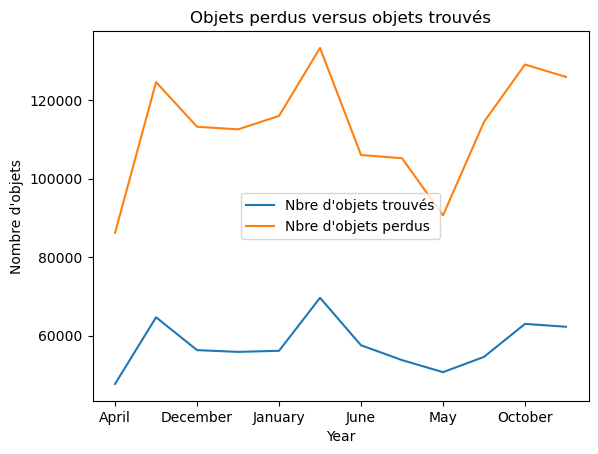

In [68]:
plt.figure(figsize=(12,12))
df_otpm.plot(kind='line', x='Month', y=["Nbre d'objets trouvés","Nbre d'objets perdus"])
plt.title('Objets perdus versus objets trouvés')
plt.xlabel('Year')
plt.ylabel("Nombre d'objets")
plt.show()

In [80]:
otd= pd.DataFrame(dft['day'].value_counts())
otd.reset_index(inplace=True)
otd.rename(columns={'index': 'Day', 'day':"Nbre d'objets trouvés"}, inplace=True)
otd.head()

Day  Nbre d'objets trouvés
0     Monday                 142646
1    Tuesday                 115557
2     Friday                 109302
3  Wednesday                 107666
4   Thursday                 104840

In [81]:
otd[otd["Nbre d'objets trouvés"] == otd["Nbre d'objets trouvés"].max()]

Day  Nbre d'objets trouvés
0  Monday                 142646

In [82]:
opd= pd.DataFrame(dfp['day'].value_counts())
opd.reset_index(inplace=True)
opd.rename(columns={'index': 'Day', 'day':"Nbre d'objets perdus"}, inplace=True)
opd.head()

Day  Nbre d'objets perdus
0     Monday                256949
1    Tuesday                213587
2     Friday                213369
3  Wednesday                202578
4   Thursday                197623

In [83]:
opd[opd["Nbre d'objets perdus"] == opd["Nbre d'objets perdus"].max()]

Day  Nbre d'objets perdus
0  Monday                256949

In [84]:
df_otpd= otd.merge(opd, on='Day')
df_otpd.head()

Day  Nbre d'objets trouvés  Nbre d'objets perdus
0     Monday                 142646                256949
1    Tuesday                 115557                213587
2     Friday                 109302                213369
3  Wednesday                 107666                202578
4   Thursday                 104840                197623

<Figure size 1200x1200 with 0 Axes>

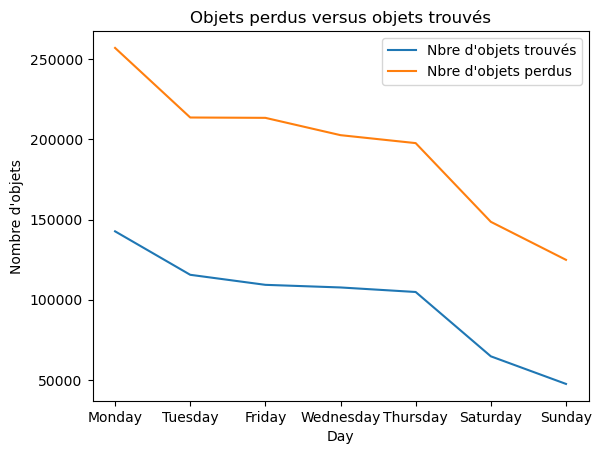

In [85]:
plt.figure(figsize=(12,12))
df_otpd.plot(kind='line', x='Day', y=["Nbre d'objets trouvés","Nbre d'objets perdus"])
plt.title('Objets perdus versus objets trouvés')
plt.xlabel('Day')
plt.ylabel("Nombre d'objets")
plt.show()

### 6-b. Traçons trois courbes affichant l’évolution du nombres d’objets déclarés perdus, trouvés et restitué depuis le début du jeu de donnée.

In [111]:
dft['year_r']= dft['Date et heure de restitution'].dt.year
dft.head()

Date Date et heure de restitution                Gare    Code UIC  \
0 2019-08-12                          NaT           Périgueux  87595009.0   
1 2019-08-12                   2019-08-20          Strasbourg  87212027.0   
2 2019-08-12                          NaT  Paris Gare de Lyon  87686006.0   
3 2019-08-12                          NaT               Brest  87474007.0   
4 2019-08-12                          NaT  Paris Gare de Lyon  87686006.0   

                                 Nature d'objets  \
0                             Téléphone portable   
1     Téléphone portable protégé (étui, coque,…)   
2  Cartable, trousse d'écolier, dossier scolaire   
3   Manteau, veste, blazer, parka, blouson, cape   
4                                      Sac à dos   

                                       Type d'objets Type d'enregistrement  \
0  Appareils électroniques, informatiques, appare...          Objet trouvé   
1  Appareils électroniques, informatiques, appare...          Objet trouvé   
2                Articles d'enfants, de puériculture          Objet trouvé   
3                              Vêtements, chaussures          Objet trouvé   
4                Bagagerie: sacs, valises, cartables          Objet trouvé   

   year   month     day  Year_r  year_r  
0  2019  August  Monday     NaN     NaN  
1  2019  August  Monday  2019.0  2019.0  
2  2019  August  Monday     NaN     NaN  
3  2019  August  Monday     NaN     NaN  
4  2019  August  Monday     NaN     NaN

In [112]:
dft['year_r'].replace(np.nan, 0, inplace=True)
dft['Year_r']=dft['year_r'].astype(int)

In [113]:
dft.drop(columns=['year_r'], axis=1, inplace=True)
dft.head()

Date Date et heure de restitution                Gare    Code UIC  \
0 2019-08-12                          NaT           Périgueux  87595009.0   
1 2019-08-12                   2019-08-20          Strasbourg  87212027.0   
2 2019-08-12                          NaT  Paris Gare de Lyon  87686006.0   
3 2019-08-12                          NaT               Brest  87474007.0   
4 2019-08-12                          NaT  Paris Gare de Lyon  87686006.0   

                                 Nature d'objets  \
0                             Téléphone portable   
1     Téléphone portable protégé (étui, coque,…)   
2  Cartable, trousse d'écolier, dossier scolaire   
3   Manteau, veste, blazer, parka, blouson, cape   
4                                      Sac à dos   

                                       Type d'objets Type d'enregistrement  \
0  Appareils électroniques, informatiques, appare...          Objet trouvé   
1  Appareils électroniques, informatiques, appare...          Objet trouvé   
2                Articles d'enfants, de puériculture          Objet trouvé   
3                              Vêtements, chaussures          Objet trouvé   
4                Bagagerie: sacs, valises, cartables          Objet trouvé   

   year   month     day  Year_r  
0  2019  August  Monday       0  
1  2019  August  Monday    2019  
2  2019  August  Monday       0  
3  2019  August  Monday       0  
4  2019  August  Monday       0

In [115]:
otr = pd.DataFrame(dft['Year_r'].value_counts()).sort_index(ascending=True)
otr.reset_index(inplace=True)
otr.rename(columns={'index': 'Year', 'Year_r':"Nbre d'objets restitués"}, inplace=True)
otr.drop(0, axis=0, inplace=True)
otr.head()

Year  Nbre d'objets restitués
1  2013                     3346
2  2014                    24794
3  2015                    30401
4  2016                    31891
5  2017                    33591

In [117]:
df_optra=df_otpa.merge(otr, on='Year')
df_optra.head()

Year  Nbre d'objets trouvés  Nbre d'objets perdus  Nbre d'objets restitués
0  2013                  12989                  8853                     3346
1  2014                  87117                114106                    24794
2  2015                  98578                181098                    30401
3  2016                  95555                177241                    31891
4  2017                  97924                192931                    33591

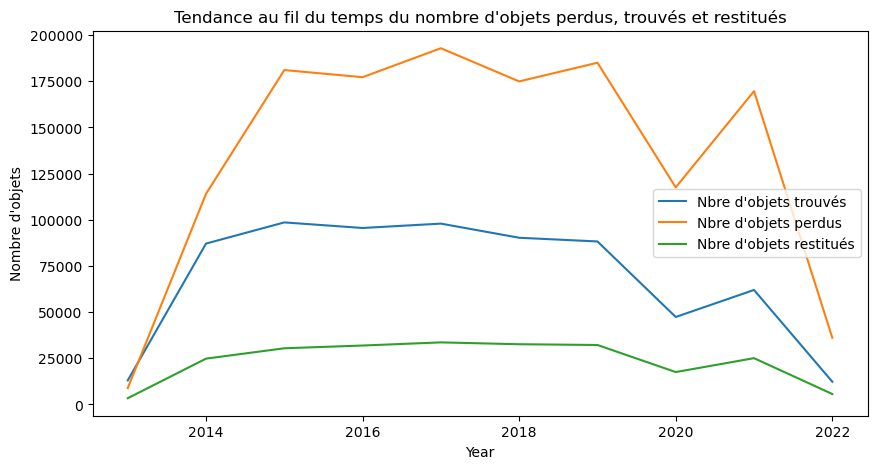

In [121]:

df_optra.plot(kind='line', x='Year', y=["Nbre d'objets trouvés","Nbre d'objets perdus","Nbre d'objets restitués"], figsize=(10,5))
plt.title("Tendance au fil du temps du nombre d'objets perdus, trouvés et restitués")
plt.xlabel('Year')
plt.ylabel("Nombre d'objets")
plt.show()

### 7. Trouvons les 3 gares où il y a le plus d’objets restitués en pourcentage des objets trouvés.

In [123]:
stat3 = pd.DataFrame(dft.groupby("Gare")[["year","Year_r"]].sum())
stat3.rename(columns={'year': 'Nbre objets trouvés', 'Year_r': 'Nbre objets restitués'}, inplace=True)
stat3.head(5)

Nbre objets trouvés  Nbre objets restitués
Gare                                                               
Abbeville                             102762                  28213
Agen                                 4196053                1539310
Aix-en-Provence TGV                  5456198                1865466
Aix-les-Bains le Revard               554932                 135223
Alençon                                86649                  34262

In [126]:
stat3['Pourcentage'] = ((stat3["Nbre objets restitués"]/stat3["Nbre objets trouvés"])*100)
stat3.sort_values(by='Pourcentage', ascending=False).head(3)


Nbre objets trouvés  Nbre objets restitués  Pourcentage
Gare                                                                    
Bellegarde                   2129782                1359344    63.825500
Dieppe                        203688                 127075    62.387082
Bourg-en-Bresse              1528775                 950022    62.142696

Les trois gares où il y a le plus d'objets restitués en pourcentage d'objets trouvés sont : 
Gare de Bellegarde avec 63,82% d'objets restitués en pourcentage d'objets trouvés;
Gare de Dieppe avec 62,38% d'objets restitués en pourcentage d'objets trouvés;
Gare de Bourg-en-Bresse avec 62,14% d'objets restitués en pourcentage d'objets trouvés.

### 8-a. Calculons le volume d’objets déclarés perdus par gare

In [129]:
df_odp = pd.DataFrame(dfp.groupby("Gare")["year"].sum())
df_odp.rename(columns={'year': "Nbre d'objets déclarés perdus"}, inplace=True)
df_odp.sort_values(by="Nbre d'objets déclarés perdus", ascending=False).head()

Nbre d'objets déclarés perdus
Gare                                             
Paris Gare de Lyon                       93998552
Paris Montparnasse                       79882270
Paris Gare du Nord                       60217129
Paris Saint-Lazare                       60149661
Strasbourg                               38006769

### 8-b. Associons à chaque gare une position GPS pour pouvoir l’afficher sur la carte

In [130]:
pip install geopy 

     -------------------------------------- 119.8/119.8 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 40.3/40.3 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [131]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim

In [132]:
adress = pd.DataFrame((dft["Gare"]).dropna().value_counts())
adress = adress.rename_axis('gare').reset_index()
adress = adress.drop(columns="Gare")
adress

gare
0    Paris Gare de Lyon
1    Paris Montparnasse
2    Paris Gare du Nord
3            Strasbourg
4    Paris Saint-Lazare
..                  ...
176            Biarritz
177    Thonon-les-Bains
178      Lille Flandres
179          Bar-le-Duc
180             Forbach

[181 rows x 1 columns]

In [133]:
adress["gare"] = adress["gare"].apply(lambda x: x if "Gare" in x else "Gare " + x)
adress

gare
0         Paris Gare de Lyon
1    Gare Paris Montparnasse
2         Paris Gare du Nord
3            Gare Strasbourg
4    Gare Paris Saint-Lazare
..                       ...
176            Gare Biarritz
177    Gare Thonon-les-Bains
178      Gare Lille Flandres
179          Gare Bar-le-Duc
180             Gare Forbach

[181 rows x 1 columns]

In [134]:
loc = Nominatim(user_agent="Getloc")
adress["Longitude"] = adress["gare"].apply((loc.geocode))
adress["Longitude"] = adress["Longitude"].apply(lambda x: (x.longitude) if x is not None else x)

In [136]:
loc = Nominatim(user_agent="Getloc2")
adress["Latitude"] = adress["gare"].apply((loc.geocode))
adress["Latitude"] = adress["Latitude"].apply(lambda x: (x.latitude) if x is not None else x)

In [40]:
adress

gare  Longitude   Latitude
0         Paris Gare de Lyon   2.373479  48.844806
1    Gare Paris Montparnasse   2.323221  48.841624
2         Paris Gare du Nord   2.354973  48.880400
3            Gare Strasbourg   7.733925  48.585293
4    Gare Paris Saint-Lazare   2.325237  48.876530
..                       ...        ...        ...
176            Gare Biarritz  -1.557936  43.479487
177    Gare Thonon-les-Bains   6.481570  46.368963
178      Gare Lille Flandres   3.070667  50.636327
179          Gare Bar-le-Duc   5.321196  48.686392
180             Gare Forbach   6.529573  49.290045

[181 rows x 3 columns]

### 8-c. Affichons la donnée sur la carte

In [139]:
df_odp = df_odp.rename_axis('gare').reset_index()
df_odp

gare  Nbre d'objets déclarés perdus
0                  Abbeville                          70522
1                       Agen                        2365932
2        Aix-en-Provence TGV                        2932545
3    Aix-les-Bains le Revard                         161395
4                    Alençon                         135023
..                       ...                            ...
178                   Yvetot                         163254
179                   Épinal                         431453
180     Étaples - Le Touquet                         112837
181          Évian-les-Bains                          44377
182         Évreux Normandie                         520046

[183 rows x 2 columns]

In [140]:
df_odp["gare"] = df_odp["gare"].apply(lambda x: x if "Gare" in x else "Gare " + x)
df_odp

gare  Nbre d'objets déclarés perdus
0                  Gare Abbeville                          70522
1                       Gare Agen                        2365932
2        Gare Aix-en-Provence TGV                        2932545
3    Gare Aix-les-Bains le Revard                         161395
4                    Gare Alençon                         135023
..                            ...                            ...
178                   Gare Yvetot                         163254
179                   Gare Épinal                         431453
180     Gare Étaples - Le Touquet                         112837
181          Gare Évian-les-Bains                          44377
182         Gare Évreux Normandie                         520046

[183 rows x 2 columns]

In [141]:
Tableau_final_gare_odp = adress.merge(df_odp)

In [142]:
Tableau_final_gare_odp = Tableau_final_gare_odp.dropna()
Tableau_final_gare_odp.head()

gare  Longitude   Latitude  \
0       Paris Gare de Lyon   2.373479  48.844806   
1  Gare Paris Montparnasse   2.323101  48.841641   
2       Paris Gare du Nord   2.354973  48.880400   
3          Gare Strasbourg   7.733925  48.585293   
4  Gare Paris Saint-Lazare   2.325237  48.876530   

   Nbre d'objets déclarés perdus  
0                       93998552  
1                       79882270  
2                       60217129  
3                       38006769  
4                       60149661

In [143]:
pip install folium

     ------------------------------------ 102.3/102.3 kB 652.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [144]:
import folium

In [145]:
france = folium.Map(location=[46.227638, 2.213749],width="%100",height="%100", default_zoom_start=15)
france

In [147]:
for i in range(0,len(Tableau_final_gare_odp)):
   folium.Circle(
      location=[Tableau_final_gare_odp.iloc[i]['Latitude'], Tableau_final_gare_odp.iloc[i]['Longitude']],
      popup=Tableau_final_gare_odp.iloc[i][['gare',"Nbre d'objets déclarés perdus"]],
      radius=float(Tableau_final_gare_odp.iloc[i]["Nbre d'objets déclarés perdus"])/10000,
      color='blue',
      fill=True,
      fill_color='None'
   ).add_to(france)

In [148]:
france

### 8-d. (Bonus) Ajoutons un sélecteur de “type d’objets” pour avoir une carte par catégorie

In [149]:
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim 


In [150]:
perdus = pd.read_csv('objets-trouves-gares.csv', sep=";")
df_perdus = perdus.copy()

In [151]:
selecteur = df_perdus.groupby(["Gare", "Type d'objets"]).size().reset_index(name="Count")
selecteur.head(2)

Gare                                      Type d'objets  Count
0  Abbeville  Appareils électroniques, informatiques, appare...      4
1  Abbeville                Bagagerie: sacs, valises, cartables     16

In [152]:
selecteur["Gare"] = selecteur["Gare"].apply(lambda x: x if "Gare" in x else "Gare "+ x)

In [ ]:
loc = Nominatim(user_agent="GetLoc") 
selecteur["Coordonnées"] = (selecteur["Gare"].apply(loc.geocode))
selecteur["Latitude"] = selecteur["Coordonnées"].apply(lambda x: (x.latitude) if x is not None else x)
selecteur["Longitude"] = selecteur["Coordonnées"].apply(lambda x: (x.longitude) if x is not None else x)

In [55]:
selecteur = selecteur.dropna(subset=["Latitude"])

In [56]:
from os import name
import folium
mapCart = folium.Map(location=[46.227638, 2.213749],zoom_start=6)

typeObjets= selecteur["Type d'objets"].drop_duplicates()


i=0
for typeObjet in typeObjets:
    df_filtre = selecteur[selecteur["Type d'objets"] == typeObjet]
    shapesLayer = folium.FeatureGroup(name=typeObjet).add_to(mapCart)
    
    for ind,gare,vol,lat,lon in df_filtre[["Gare", "Count", "Latitude","Longitude"]][:].itertuples():
        folium.Circle(location=[lat, lon],
                    radius=vol,
                    weight=2,
                    color="green",
                    fill_color='red',
                    tooltip="Click me!",
                    popup=("<h4  style='color:#377D22;'><b>Type d\'objets: </h4></b> : "+ str(typeObjet)+
                           "<h4  style='color:#0023F5;'><b>" + str(gare) +"</h4></b>" 
                           +"\n"+" <b>Volume Perdus : </b>"+ str(vol)
                            )
                    ).add_to(shapesLayer)
    i=i+1
folium.LayerControl().add_to(mapCart)

mapCart

### 9. Question libre

In [173]:
#Affichons le top 5 des types d'objets déclarés perdus
df_todp = pd.DataFrame(dfp["Type d'objets"].value_counts())
df_todp["Pourcentage d'objets perdus"] = (df_todp["Type d'objets"]/len(dfp["Type d'objets"]))*100
df_todp.reset_index(inplace=True)
df_todp.rename(columns={'index':"Type d'objets", "Type d'objets": "Nombre déclarés perdus"}, inplace=True)
df_top5_odp=df_todp.sort_values(by="Pourcentage d'objets perdus", ascending=False).head()
df_top5_odp.head()

Type d'objets  Nombre déclarés perdus  \
0                Bagagerie: sacs, valises, cartables                  389399   
1  Appareils électroniques, informatiques, appare...                  249962   
2                              Vêtements, chaussures                  157115   
3       Porte-monnaie / portefeuille, argent, titres                  146590   
4           Pièces d'identités et papiers personnels                  102537   

   Pourcentage d'objets perdus  
0                    28.683594  
1                    18.412498  
2                    11.573278  
3                    10.797994  
4                     7.552997

On observe que les bagageries, les appareils électroniques et les vêtements sont en tête de liste des objets perdus. 
Les bagageries représentent plus de 50% des objets perdus ce qui traduit donc que les voyageurs ont la plupart du
temps, tendance à oublier leurs sacs, valises ou cartables. Cela peut être lié au fait d'être pressé ou à l'inatention
des voyageurs.

In [174]:
#Affichons le top 5 des types d'objets retrouvés
df_tot = pd.DataFrame(dft["Type d'objets"].value_counts())
df_tot["Pourcentage d'objets trouvés"] = (df_tot["Type d'objets"]/len(dft["Type d'objets"]))*100
df_tot.reset_index(inplace=True)
df_tot.rename(columns={'index':"Type d'objets", "Type d'objets": "Nombre déclarés trouvés"}, inplace=True)
df_top5_ot=df_tot.sort_values(by="Pourcentage d'objets trouvés", ascending=False).head()
df_top5_ot

Type d'objets  Nombre déclarés trouvés  \
0                Bagagerie: sacs, valises, cartables                   206723   
1  Appareils électroniques, informatiques, appare...                   101600   
2                              Vêtements, chaussures                    90194   
3       Porte-monnaie / portefeuille, argent, titres                    82369   
4           Pièces d'identités et papiers personnels                    61777   

   Pourcentage d'objets trouvés  
0                     29.859889  
1                     14.675507  
2                     13.027979  
3                     11.897705  
4                      8.923315

On remarque que le classement des objets les plus retrouvés correspond au classement des objets les plus perdus avec les bagageries en tête de liste également. Cependant la proportion des objets de types bagagerie retrouvés n'est pas aussi forte au sein des objets retrouvés comparé à la proportion de ce type d'objets au sein des objets perdus.

In [175]:
df_totp=df_top5_odp.merge(df_top5_ot, on="Type d'objets")
df_totp.head()

Type d'objets  Nombre déclarés perdus  \
0                Bagagerie: sacs, valises, cartables                  389399   
1  Appareils électroniques, informatiques, appare...                  249962   
2                              Vêtements, chaussures                  157115   
3       Porte-monnaie / portefeuille, argent, titres                  146590   
4           Pièces d'identités et papiers personnels                  102537   

   Pourcentage d'objets perdus  Nombre déclarés trouvés  \
0                    28.683594                   206723   
1                    18.412498                   101600   
2                    11.573278                    90194   
3                    10.797994                    82369   
4                     7.552997                    61777   

   Pourcentage d'objets trouvés  
0                     29.859889  
1                     14.675507  
2                     13.027979  
3                     11.897705  
4                      8.923315

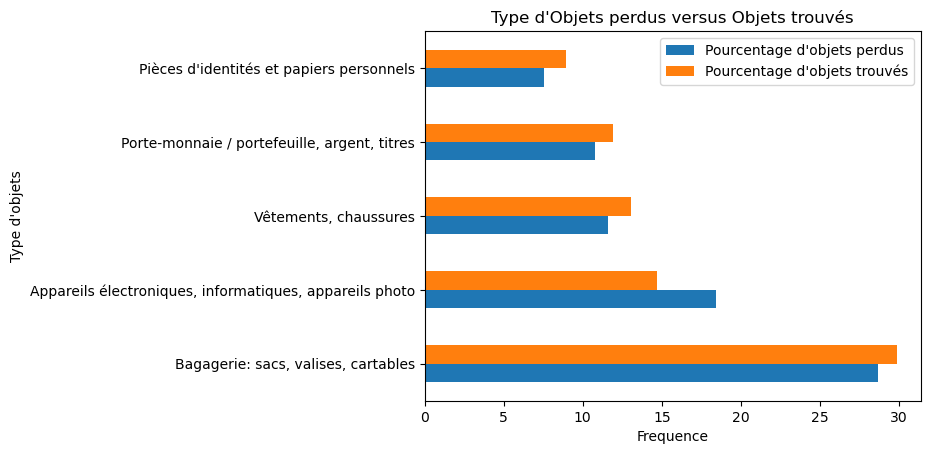

In [178]:
df_totp.plot(kind='barh', x="Type d'objets", y=["Pourcentage d'objets perdus","Pourcentage d'objets trouvés"])
plt.title("Type d'Objets perdus versus Objets trouvés")
plt.xlabel('Frequence')
plt.show()

### 10. Créons un modèle de machine learning qui pourra prédire le nombre d’objets perdus en 2022. 

In [183]:
opa= opa.iloc[0:9,:]
opa

Year  Nbre d'objets perdus
0  2013                  8853
1  2014                114106
2  2015                181098
3  2016                177241
4  2017                192931
5  2018                174955
6  2019                185066
7  2020                117561
8  2021                169673

In [184]:
opa["Nbre d'objets perdus"].describe()

count         9.000000
mean     146831.555556
std       59123.201833
min        8853.000000
25%      117561.000000
50%      174955.000000
75%      181098.000000
max      192931.000000
Name: Nbre d'objets perdus, dtype: float64

<AxesSubplot:xlabel='Year', ylabel="Nbre d'objets perdus">

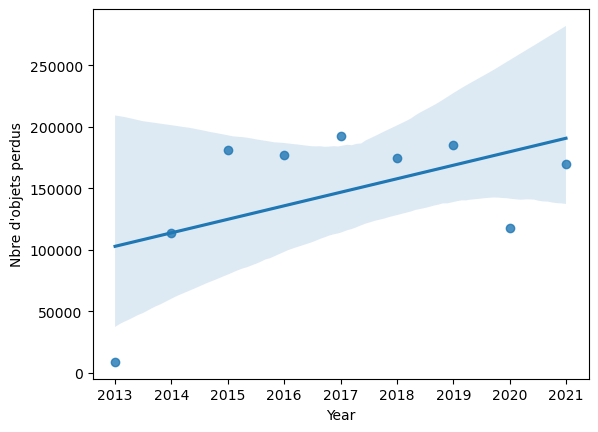

In [185]:
import seaborn as sns
sns.regplot(y="Nbre d'objets perdus", x='Year', data=opa)

In [189]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [192]:
x=opa[["Year"]]
y=opa["Nbre d'objets perdus"]
lm.fit(x,y)
print("La constante du modèle est: ", lm.intercept_)
print("Le coefficient du modèle est: ", lm.coef_)
print("Le R^2 du modèle est:", lm.score(x,y))



La constante du modèle est:  -22016468.69444445
Le coefficient du modèle est:  [10988.25]
Le R^2 du modèle est: 0.25906123773745116


<b>Nombre d'Objets Perdus</b> = -22016468.69444445 + 10988.25 * <b>Year</b> 

In [200]:
 print ("Selon les prédictions, environ ", int(lm.predict([[2022]]))," objets, seront déclarés perdus en 2022.")

Selon les prédictions, environ  201772  objets, seront déclarés perdus en 2022.


C:\Users\VODOUMBO Miracle\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
